# Simulação de um conversor Cuk 

## Parâmetros do conversor
Vin = 30V
L1 = 22uH
L2 = 22uH
Cc = 10uF
Co = 100uF
Rl = 5
Freq = 100e3







## Resolvendo o circuito

**O circuito**

![Cuk](./assets/cuk-circuit.png)



### Resolvendo o circuito para quando a chave está fechada

![Cuk on](./assets/cuk-on.png)


**Malha i1**

$$vl = L1 * \frac{di_1}{dt}$$

$$vl = vin$$

$$vin = L1 * \frac{di_1}{dt}$$

$$\frac{vin}{L1} = \frac{di_1}{dt}$$

$$i_1 = \int \frac{vin}{L1} dt + i_{l_0}$$

**Malha i2**

$$v_{c_1} + v_{l_2} = -v_{c_2}$$

$$v_{l_2} = L2 * \frac{di_2}{dt}$$

$$i_2 = \frac{1}{L2} \int (-v_{c_2} - v_{c_1}) dt + i_{l_{2_0}}$$

$$v_{c_1} = \frac{1}{C_1} \int i_2 dt + v_{c_{1_0}}$$

$$v_{c_2} = \frac{1}{C_2} \int (i_2 - i_3) dt + v_{c_{2_0}}$$

**Malha i3**

$$i_3 = \frac{v_{c_2}}{R_L}$$









### Resolvendo o circuito para quando a chave está aberta

![Cuk off](./assets/cuk-off.png)

**Malha i1**

$$v_{c_1} = vin - v_{l_1}$$

$$v_{l_1} = L1 * \frac{di_1}{dt}$$

$$i_1 = \frac{1}{L1} \int (vin - v_{c_1}) dt + i_{l_{1_0}}$$

$$v_{c_1} = \frac{1}{C_1} \int i_1 dt + v_{c_{1_0}}$$

**Malha i2**

$$v_{l_2} = -v_{c_2}$$

$$v_{l_2} = L2 * \frac{di_2}{dt}$$

$$i_2 = \frac{1}{L2} \int (-v_{c_2}) dt + i_{l_{2_0}}$$

$$v_{c_2} = \frac{1}{C_2} \int (i_2 - i_3) dt + v_{c_{2_0}}$$

**Malha i3**

$$i_3 = \frac{v_{c_2}}{R_L}$$





0.01
cuk["c1"]] = 1e-05 il1 = 0.0 vc1 = 29.0, dt = 0.01
cuk["c1"]] = 1e-05 il1 = 454.54545454545456 vc1 = 29.0, dt = 0.01
cuk["c1"]] = 1e-05 il1 = -206610661.1570248 vc1 = 454574.45454545453, dt = 0.01
cuk["c1"]] = 1e-05 il1 = 93913523667779.86 vc1 = -206610206582.57022, dt = 0.01


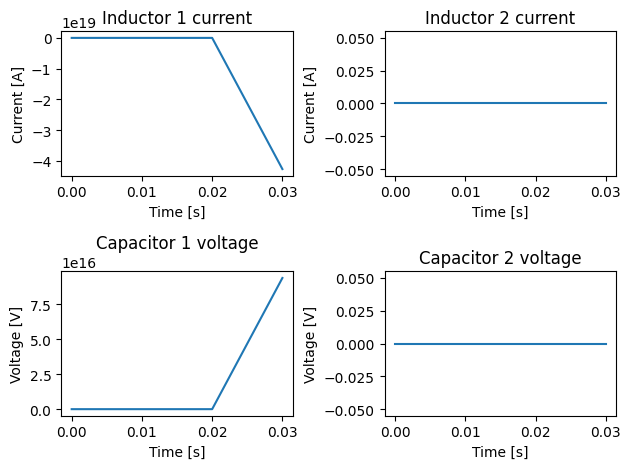

In [45]:
import numpy as np

cuk = {
	"l1": 22e-6,
	"l2": 22e-6,
	"c1": 10e-6,
	"c2": 100e-6,
	"rl": 5,
	"freq": 100e3,
}



def cuk_close_switch(cuk, dt, il1, il2, vc1, vc2, vin):
	"""Close switch case in Cuk converter"""

	# Calculate il1
	il1 += (vin / cuk["l1"]) * dt

	# Calculate i2
	vc1 += (1 / cuk["c1"]) * il2 * dt
	vc2 += (1 / cuk["c2"]) * (il2 - (vc2 / cuk["rl"])) * dt
	il2 += (1 / cuk["l2"]) * (-vc1 - vc2) * dt

	return il1, il2, vc1, vc2

def cuk_open_switch(cuk, dt, il1, il2, vc1, vc2, vin):
	"""Open switch case in Cuk converter"""

	# Calculate i1

	print(f"cuk[\"c1\"]] = {cuk['c1']} il1 = {il1} vc1 = {vc1}, dt = {dt}")
	vc1 += (1 / cuk["c1"]) * il1 * dt
	il1 += (1 / cuk["l1"]) * (vin - vc1) * dt

	# Calculate i2
	vc2 += (1 / cuk["c2"]) * (il2 - (vc2 / cuk["rl"])) * dt
	il2 += (1 / cuk["l2"]) * (-vc2) * dt

	return il1, il2, vc1, vc2

def simulate_cuk(cuk):

	# Calculate the time step
	dt = (1 / cuk["freq"]) * 1000
	print(dt)

	period = 1 / cuk["freq"]

	# Create initial state
	time = [0.0]
	il1_values = [0.0]
	il2_values = [0.0]
	vc1_values = [29.0]
	vc2_values = [0.0]
	vin = 30.0

	il1 = il1_values[-1]
	il2 = il2_values[-1]
	vc1 = vc1_values[-1]
	vc2 = vc2_values[-1]


	# Simulate for 10s with duty cycle 50% and 100 kHz
	for t in np.arange(0, 0.04, dt):

		(il1, il2, vc1, vc2) = \
			cuk_open_switch(cuk, dt, il1, il2, vc1, vc2, vin)


		time.append(t)
		il1_values.append(il1)
		il2_values.append(il2)
		vc1_values.append(vc1)
		vc2_values.append(vc2)

	return time, il1_values, il2_values, vc1_values, vc2_values

# Run the simulation
( time, il1_values, il2_values, vc1_values, vc2_values) = simulate_cuk(cuk)


# Plot the results
import matplotlib.pyplot as plt

plt.subplot(2, 2, 1)
plt.plot(time, il1_values)
plt.xlabel("Time [s]")
plt.ylabel("Current [A]")
plt.title("Inductor 1 current")

plt.subplot(2, 2, 2)
plt.plot(time, il2_values)
plt.xlabel("Time [s]")
plt.ylabel("Current [A]")
plt.title("Inductor 2 current")

plt.subplot(2, 2, 3)
plt.plot(time, vc1_values)
plt.xlabel("Time [s]")
plt.ylabel("Voltage [V]")
plt.title("Capacitor 1 voltage")

plt.subplot(2, 2, 4)
plt.plot(time, vc2_values)
plt.xlabel("Time [s]")
plt.ylabel("Voltage [V]")
plt.title("Capacitor 2 voltage")

plt.tight_layout()


	
	

		


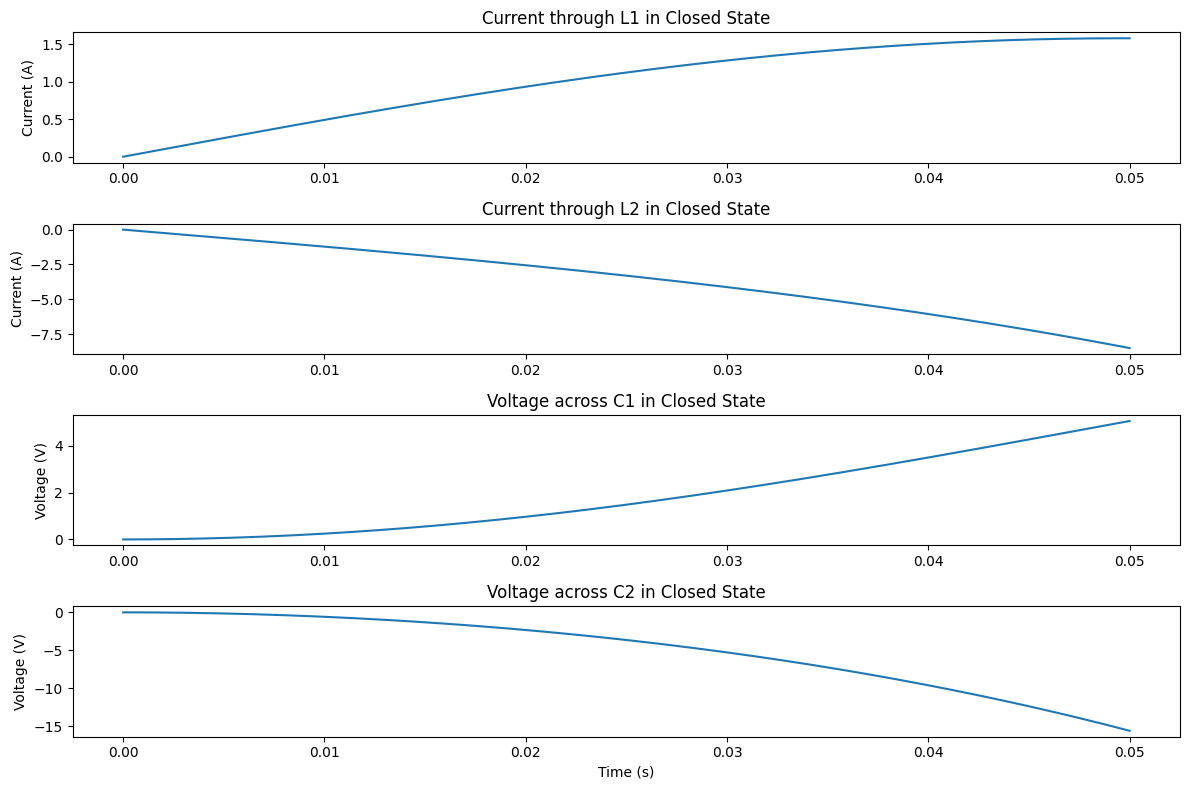

In [48]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants and Parameters
Vi = 5    # Input voltage in Volts
Vo = 12   # Output voltage in Volts
L1 = 0.1  # Inductance of L1 in Henrys
L2 = 0.1  # Inductance of L2 in Henrys
C1 = 0.01 # Capacitance of C1 in Farads
C2 = 0.01 # Capacitance of C2 in Farads
Ro = 10   # Output load resistance in Ohms

# Differential equation for Closed Switch State
def cuk_converter_closed(t, y):
    i_L1, i_L2, v_C1, v_C2 = y
    di_L1_dt = (Vi - v_C1) / L1
    di_L2_dt = (v_C2 - Vo) / L2
    dv_C1_dt = i_L1 / C1
    dv_C2_dt = (i_L2 - v_C2 / Ro) / C2
    return [di_L1_dt, di_L2_dt, dv_C1_dt, dv_C2_dt]

# Differential equation for Open Switch State
def cuk_converter_open(t, y):
    i_L1, i_L2, v_C1, v_C2 = y
    di_L1_dt = (Vi - v_C1) / L1
    di_L2_dt = (v_C2 - Vo) / L2
    dv_C1_dt = i_L1 / C1
    dv_C2_dt = (i_L2 - v_C2 / Ro) / C2
    return [di_L1_dt, di_L2_dt, dv_C1_dt, dv_C2_dt]

# Initial conditions
initial_conditions = [0, 0, 0, 0]  # i_L1(0), i_L2(0), v_C1(0), v_C2(0)

# Time span for the simulation
t_span = (0, 0.05)  # Simulate for 50 milliseconds
t_eval = np.linspace(*t_span, 500)

# Solve the ODE for Closed Switch State
solution_closed = solve_ivp(cuk_converter_closed, t_span, initial_conditions, t_eval=t_eval)

# Solve the ODE for Open Switch State
solution_open = solve_ivp(cuk_converter_open, t_span, initial_conditions, t_eval=t_eval)



# Plotting results for Closed Switch State
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(solution_closed.t, solution_closed.y[0])
plt.title('Current through L1 in Closed State')
plt.ylabel('Current (A)')

plt.subplot(4, 1, 2)
plt.plot(solution_closed.t, solution_closed.y[1])
plt.title('Current through L2 in Closed State')
plt.ylabel('Current (A)')

plt.subplot(4, 1, 3)
plt.plot(solution_closed.t, solution_closed.y[2])
plt.title('Voltage across C1 in Closed State')
plt.ylabel('Voltage (V)')

plt.subplot(4, 1, 4)
plt.plot(solution_closed.t, solution_closed.y[3])
plt.title('Voltage across C2 in Closed State')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')

plt.tight_layout()
plt.show()



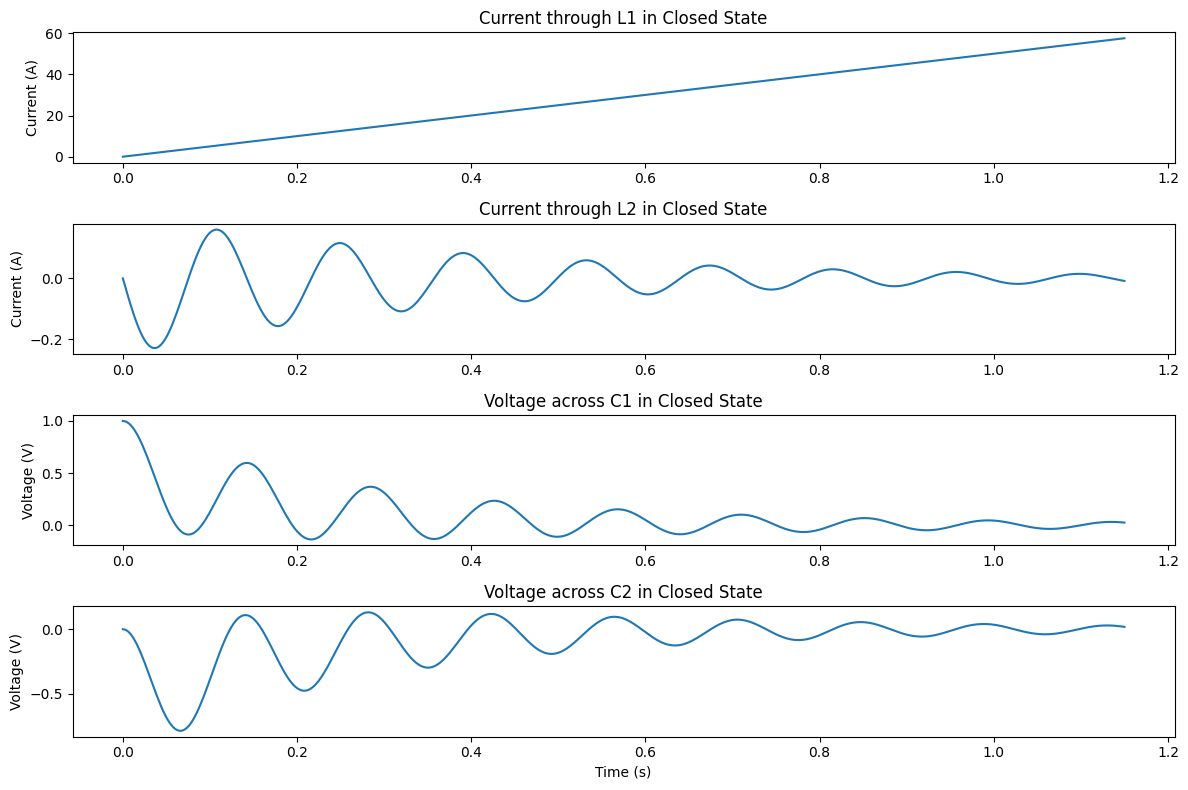

In [53]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants and Parameters
Vi = 5    # Input voltage in Volts
Vo = 12   # Output voltage in Volts
L1 = 0.1  # Inductance of L1 in Henrys
L2 = 0.1  # Inductance of L2 in Henrys
C1 = 0.01 # Capacitance of C1 in Farads
C2 = 0.01 # Capacitance of C2 in Farads
Ro = 10   # Output load resistance in Ohms

# Differential equation for Closed Switch State
def cuk_converter_closed(t, y):
    i_L1, i_L2, v_C1, v_C2 = y
    di_L1_dt = (Vi) / L1
    di_L2_dt = (-v_C1 - v_C2) / L2
    dv_C1_dt = i_L2 / C1
    dv_C2_dt = (i_L2 - v_C2 / Ro) / C2
    return [di_L1_dt, di_L2_dt, dv_C1_dt, dv_C2_dt]

# Differential equation for Open Switch State
def cuk_converter_open(t, y):
    i_L1, i_L2, v_C1, v_C2 = y
    di_L1_dt = (Vi - v_C1) / L1
    di_L2_dt = (v_C2) / L2
    dv_C1_dt = i_L1 / C1
    dv_C2_dt = (i_L2 - v_C2 / Ro) / C2
    return [di_L1_dt, di_L2_dt, dv_C1_dt, dv_C2_dt]

# Initial conditions
initial_conditions = [0, 0, 1, 0]  # i_L1(0), i_L2(0), v_C1(0), v_C2(0)

# Time span for the simulation
t_span = (0, 1.15)  # Simulate for 50 milliseconds
t_eval = np.linspace(*t_span, 500)

# Solve the ODE for Closed Switch State
solution_closed = solve_ivp(cuk_converter_closed, t_span, initial_conditions, t_eval=t_eval)

# Solve the ODE for Open Switch State
solution_open = solve_ivp(cuk_converter_open, t_span, initial_conditions, t_eval=t_eval)



# Plotting results for Closed Switch State
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(solution_closed.t, solution_closed.y[0])
plt.title('Current through L1 in Closed State')
plt.ylabel('Current (A)')

plt.subplot(4, 1, 2)
plt.plot(solution_closed.t, solution_closed.y[1])
plt.title('Current through L2 in Closed State')
plt.ylabel('Current (A)')

plt.subplot(4, 1, 3)
plt.plot(solution_closed.t, solution_closed.y[2])
plt.title('Voltage across C1 in Closed State')
plt.ylabel('Voltage (V)')

plt.subplot(4, 1, 4)
plt.plot(solution_closed.t, solution_closed.y[3])
plt.title('Voltage across C2 in Closed State')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')

plt.tight_layout()
plt.show()



In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros físicos do conversor Cuk
L1 = 1e-3  # Indutância L1 em Henry
L2 = 1e-3  # Indutância L2 em Henry
C1 = 1e-6  # Capacitância C1 em Farad
C2 = 1e-6  # Capacitância C2 em Farad
RL = 10    # Resistência da carga em Ohms
vin = 12   # Tensão de entrada em Volts

# Valores iniciais
i1 = 0     # Corrente no indutor L1
i2 = 0     # Corrente no indutor L2
vc1 = 0    # Tensão no capacitor C1
vc2 = 0    # Tensão no capacitor C2
di1 = 0    # Derivada da corrente i1
di2 = 0    # Derivada da corrente i2

# Parâmetros de simulação
MAX_SIM_T = 0.01  # Tempo máximo de simulação em segundos
h = 1e-7          # Passo da simulação
t = 0             # Tempo atual

# Pontos para plotagem
i1_points = []
i2_points = []
vc1_points = []
vc2_points = []
time_points = []

# Funções para calcular as derivadas
def d_i1(vin, L1):
    return 1 / L1

def d_i2(vc1, vc2, L2):
    return -(vc1 + vc2) / L2

def d_vc1(i2, C1):
    return i2 / C1

def d_vc2(i2, i3, C2):
    return (i2 - i3) / C2

def i3(vc2, RL):
    return vc2 / RL

# Simulação
while t <= MAX_SIM_T:
    # Calcular as derivadas
    di1 += d_i1(vin, L1) * h
    di2 = d_i2(vc1, vc2, L2) * h
    ddvc1 = d_vc1(i2, C1) * h
    ddvc2 = d_vc2(i2, i3(vc2, RL), C2) * h

    # Atualizar os valores usando método de Euler
    di1 += di1
    di2 += di2
    vc1 += di1 * h
    vc2 += di2 * h
    i1 += di1
    i2 += di2

    # Atualizar o tempo
    t += h

    # Salvar pontos para plotagem
    i1_points.append(i1)
    i2_points.append(i2)
    vc1_points.append(vc1)
    vc2_points.append(vc2)
    time_points.append(t)

# Plotagem dos resultados
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(time_points, i1_points)
plt.title("Corrente i1")
plt.xlabel('Tempo (s)')
plt.ylabel('Corrente (A)')

plt.subplot(2, 2, 2)
plt.plot(time_points, i2_points)
plt.title("Corrente i2")
plt.xlabel('Tempo (s)')
plt.ylabel('Corrente (A)')

plt.subplot(2, 2, 3)
plt.plot(time_points, vc1_points)
plt.title("Tensão vc1")
plt.xlabel('Tempo (s)')
plt.ylabel('Tensão (V)')

plt.subplot(2, 2, 4)
plt.plot(time_points, vc2_points)
plt.title("Tensão vc2")
plt.xlabel('Tempo (s)')
plt.ylabel('Tensão (V)')

plt.tight_layout()
plt.show()


/home/alejopm/Documents/IFSC/eng/CAN/calculo-numerico/.venv/lib/python3.11/site-packages/matplotlib/ticker.py:2094: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale
/home/alejopm/Documents/IFSC/eng/CAN/calculo-numerico/.venv/lib/python3.11/site-packages/matplotlib/ticker.py:2127: RuntimeWarning: overflow encountered in multiply
  ticks = np.arange(low, high + 1) * step + best_vmin


OverflowError: cannot convert float infinity to integer

Error in callback <function _draw_all_if_interactive at 0x7f737bc5e700> (for post_execute):


OverflowError: cannot convert float infinity to integer

OverflowError: cannot convert float infinity to integer

<Figure size 1200x800 with 4 Axes>